---
title: "Generative AI: Chapter 3"
description: "Variational Autoencoders"
date: "2024-02-28"
# image: "deep_learning_model.png"
categories: [AI, Engineering, GenerativeAI]
format:
  html:
    code-fold: true
---

# Variational Autoencoders
These are notes from chapter 3 of Generative Deep Learning by David Foster.

::: {.callout-tip title="Story Time"}
Imagine an infinite wardrobe organised by "type" of clothing. 

Shoes would be close together, but formal shoes might be closer to the suits and trainers closer to the sports gear. Shirts and t-shirts would be close together. Coats might be nearby; the shirt->coat vector applied to t-shirts might lead you to "invent" gilets.

This encapsulates the idea of using a lower dimensional (2D in this case) latent space to **encode** the representation of more complex objects.

We could *sample* from some of the empty spaces to invent new hybrids of clothing. This generative step is **decoding** the latent space.
:::


## 1. Autoencoders
The idea of autoencoders (read: self-encoders) is that they learn to simplify the input then reconstruct it; the input and target output are the same.

- The **encoder** learns to compress high-dimensional input data into a lower dimensional representation called the *embedding*.
- The **decoder** takes an embedding and recreates a higher-dimensional image. This should be an accurate reconstruction of the input.

This can be used as a generative model because we can the sample and decode *new* points from the latent space to generate novel outputs. The goal of training an autoencoder is to learn a meaningful embedding $z$.


```{mermaid}
flowchart LR

  A(Encoder) --> B(z)
  B(z) --> c(Decoder)
```

This also makes autoencoders useful as *denoising* models, because the embedding should retain the salient information but "lose" the noise.


## 2. Building an Autoencoder
We will implement an autoencoder to learn lower-dimensional embeddings for the [fashion MNIST data set](https://github.com/zalandoresearch/fashion-mnist).


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, datasets, callbacks
import tensorflow.keras.backend as K

# Parameters
IMAGE_SIZE = 32
CHANNELS = 1
BATCH_SIZE = 100
BUFFER_SIZE = 1000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2
EPOCHS = 3

### 2.1. Load and pre-process the data
Scale the pixel values and reshape the images.

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

def preprocess(images):
    images = images.astype("float32") / 255.0
    images = np.pad(images, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
    images = np.expand_dims(images, -1)
    return images

x_train = preprocess(x_train)
x_test = preprocess(x_test)

4422102/4422102 [==============================] - 2s 0us/step


We can see an example from our training set:

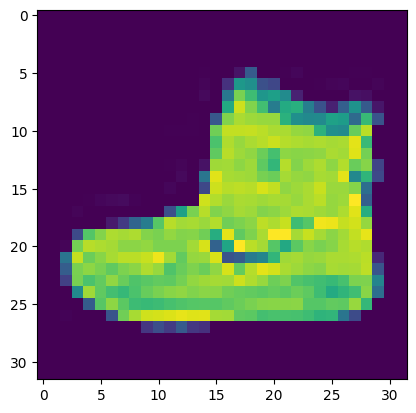

In [7]:
plt.imshow(x_train[0])

### 2.2. Build the Autoencoder